## 1 Feed-forward Neural Network 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_q1_data
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,8

In [2]:
X_train, X_test, y_train, y_test, le = get_q1_data()
print("%d training samples, %d test samples"%(X_train.shape[0], X_test.shape[0]))
print("classes:", le.classes_)
print("The first 10 training samples are (with bias):")
print(X_train[:10])

70 training samples, 30 test samples
classes: [b'Iris-versicolor' b'Iris-virginica']
The first 10 training samples are (with bias):
[[1.  5.6 3.  4.1 1.3]
 [1.  5.5 2.5 4.  1.3]
 [1.  5.5 2.6 4.4 1.2]
 [1.  6.1 3.  4.6 1.4]
 [1.  5.8 2.6 4.  1.2]
 [1.  5.  2.3 3.3 1. ]
 [1.  5.6 2.7 4.2 1.3]
 [1.  5.7 3.  4.2 1.2]
 [1.  5.7 2.9 4.2 1.3]
 [1.  6.2 2.9 4.3 1.3]]


### 1. Implement sigmoid function
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}} \\
\end{align}
<img src="Figures/logistic.png">

In [3]:
def sigmoid(x):
    ### TODO: Fill this function with your implementation of sigmoid function ####
    return 1/(1+np.exp(-x))

### 2. Implement cross entropy
For binary classification for all samples with the output vector o and target label t $\in \{0, 1\}$:
\begin{align}
L(o, t) & = - \sum_{i=1}^n(t^{(i)}log(o^{(i)}) + (1-t^{i})log(1-o^{i})) \\
\end{align}

In [4]:
def crossentropy(o,t):
    ### o is the output, t is the target.
    ### TODO: Fill this function with your implementation of crossentropy function for all samples ####
    return -np.sum(t*np.log(o) + (1-t)*np.log(1-o))

### 3. Initialize weights
For weight initialization, please refer to http://cs231n.github.io/neural-networks-2/#init.

Here we are building a feed forward neural network with 2 hidden units as shown below. 
<img src="Figures/nn.png">

In [5]:
J = 2 # number of hidden units
### TODO: Fill the information for weight initialization ###
w1 = 1* np.random.randn(5,J)/np.sqrt(5) # initialize weights with calibration between input and hidden layer.
w2 = 1* np.random.randn(J+1,1)/np.sqrt(3) # initialize weights with calibration between hidden and output layer.
n_iter = 10000 # can be modified
alpha = -0.002 # can be modified
train_err = []
test_err = []
dw1_ = []
train_loss = []

### 4. Implement gradient descent for n iterations.
Implement the update dw1 and dw2 based on your derivations for \begin{align}
\frac{\delta L}{\delta w_2}, 
\frac{\delta L}{\delta w_1}
\end{align}

In [6]:
### TODO: Fill the blanks below for gradient descent ###
#for n in range(n_iter):
for n in range(n_iter):    
    # forward computation
    layer1 = np.dot(X_train,w1)
    activate1 = sigmoid(layer1)
    layer2 = np.dot(np.hstack([np.ones((activate1.shape[0],1)),activate1]),w2)
    output = sigmoid(layer2)
    loss = crossentropy(output,y_train)
    # backward computation to calculate dw1 and dw2
    dw2 = np.dot((output-y_train).T,np.hstack([np.ones((activate1.shape[0],1)),activate1])).reshape(3,1)
    dlayer2 = np.dot(output-y_train,w2.T)
    dactivate1 = dlayer2[:,1:3]
    dw1 = np.dot((dactivate1*activate1*(1-activate1)).T,X_train).T
    # weight updating
    w1 = w1 + alpha*dw1
    w2 = w2 + alpha*dw2
    # training error
    y_predict = output > 0.5
    train_err.append(np.sum(y_predict != y_train)/len(y_train)) # calculate the error and append to train_err
    # training loss
    train_loss.append(loss) # use your crossentropy to calculate the loss
    # test error
    layer1_test = np.dot(X_test,w1)
    activate1_test = sigmoid(layer1_test)
    layer2_test = np.dot(np.hstack([np.ones((activate1_test.shape[0],1)),activate1_test]),w2)
    output_test = sigmoid(layer2_test)
    y_predict_test = output_test > 0.5
    test_err.append(np.sum(y_predict_test != y_test)/len(y_test))

### 5. Print training loss vs number of iterations

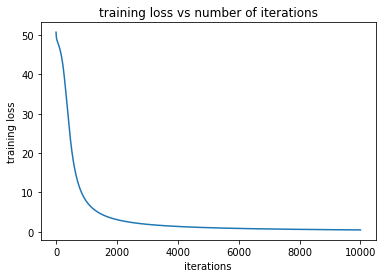

In [7]:
plt.plot(train_loss)
plt.title('training loss vs number of iterations')
plt.ylabel('training loss')
plt.xlabel('iterations')
plt.show()

### 6. Print training error and test error

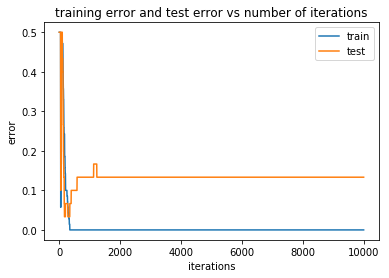

training error:	0.0000 
test error:	0.1333


In [19]:
plt.plot(train_err)
plt.plot(test_err)
plt.title('training error and test error vs number of iterations')
plt.ylabel('error')
plt.xlabel('iterations')
plt.legend(['train', 'test'])
plt.show()
print("training error:\t%.4f \ntest error:\t%.4f"%(train_err[-1],test_err[-1]))